### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

### **Data Desc**

##### Fitur Input dan Tipe
The dataset consists of 70 000 records of patients data in 12 features
| Nama Fitur                | Tipe Fitur          | Nama Kolom dalam Data | Tipe Data                  |
|---------------------------|---------------------|------------------------|----------------------------|
| **Age**                   | Objective Feature   | age                    | int (days)                 |
| **Height**                | Objective Feature   | height                 | int (cm)                   |
| **Weight**                | Objective Feature   | weight                 | float (kg)                 |
| **Gender**                | Objective Feature   | gender                 | categorical code 1 - women, 2 - men          |
| **Systolic blood pressure** | Examination Feature | ap_hi                  | int (mm/Hg)                       |
| **Diastolic blood pressure** | Examination Feature | ap_lo                  | int (mm/Hg)                        |
| **Cholesterol**           | Examination Feature | cholesterol            | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**               | Examination Feature | gluc                   | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**               | Subjective Feature  | smoke                  | binary; 0: no, 1 : yes                     |
| **Alcohol intake**        | Subjective Feature  | alco                   | binary; 0: no, 1 : yes                     |
| **Physical activity**     | Subjective Feature  | active                 | binary; 0: no, 1 : yes                     |
| **Presence or absence of cardiovascular disease** | Target Variable     | cardio                 | binary; 0: healthy, 1 : cardio                     |


### **Load Data**

In [180]:
df = pd.read_csv('data/cardio.csv', sep=';')

print('Sample Data')
display(df.head())


Sample Data


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### **Exploratory Data Analysis (EDA) Tahap 1**

In [ ]:
print('\nColumn Information\n')
display(df.info())

print('\nDescriptive Statistics')
display(df.describe())

print('\nChecking for Missing Values')
display(df.isnull().sum())


Informasi Kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None


Statistika Deskriptif


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



Mengecek Missing Values


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### **Data Insights Before Preprocessing**

**Usia (age)**
- Rata-rata usia (mean) adalah sekitar 19.469 hari (~53,3 tahun).
- Usia minimum adalah 10.798 hari (~29,6 tahun), dan usia maksimum adalah 23.713 hari (~64,9 tahun).
- Rentang usia ini menunjukkan bahwa dataset berfokus pada populasi dewasa, mungkin dengan fokus pada populasi yang berisiko terkena penyakit kardiovaskular.

**Jenis Kelamin (gender)**
- Data ini menggunakan 1 untuk perempuan dan 2 untuk laki-laki.
- Rata-rata gender adalah 1.35, yang menunjukkan bahwa dataset ini memiliki lebih banyak perempuan daripada laki-laki.

**Tinggi Badan (height)**
- Rata-rata tinggi badan adalah 164,36 cm, dengan standar deviasi 8,21 cm.
- Nilai minimum dan maksimum (55 cm hingga 250 cm) mengindikasikan adanya beberapa anomali data atau kesalahan pengukuran.

**Berat Badan (weight)**
- Berat badan rata-rata adalah 74,21 kg dengan standar deviasi 14,40 kg.
- Nilai berat minimum 10 kg dan maksimum 200 kg menunjukkan kemungkinan kesalahan atau anomali dalam data.

**Tekanan Darah Sistolik (ap_hi)**
- Nilai rata-rata adalah 128,82 mmHg, dengan standar deviasi yang sangat tinggi (154 mmHg).
- Ada nilai tekanan darah negatif (-150 mmHg), dan nilai maksimum yang sangat tinggi (16.020 mmHg), yang jelas merupakan outlier atau kesalahan input data.

**Tekanan Darah Diastolik (ap_lo)**
- Rata-rata tekanan diastolik adalah 96,63 mmHg.
- Sama seperti tekanan sistolik, terdapat outlier ekstrem (negatif hingga 11.000 mmHg), yang mengindikasikan kesalahan atau outlier dalam data.

**Kolesterol (cholesterol)**
- Data ini diklasifikasikan ke dalam 3 kategori (1, 2, 3).
- Nilai rata-rata adalah 1,37, artinya sebagian besar subjek memiliki tingkat kolesterol normal (kategori 1), dengan sebagian lainnya memiliki tingkat kolesterol di atas normal (kategori 2 atau 3).

**Glukosa (gluc)**
- Sama dengan kolesterol, glukosa juga diklasifikasikan menjadi 3 kategori.
- Rata-rata adalah 1,23, menunjukkan sebagian besar orang memiliki kadar glukosa normal.

**Perilaku Merokok (smoke)**
- Hanya sekitar 8,8% dari sampel yang merokok, ditunjukkan oleh nilai rata-rata 0,088.

**Konsumsi Alkohol (alco)**
- Rata-rata adalah 0,053, menunjukkan hanya sekitar 5,3% orang yang mengonsumsi alkohol secara rutin.

**Aktivitas Fisik (active)**
- Sebagian besar individu aktif secara fisik (rata-rata 0,80), yang berarti sekitar 80% dari data mewakili orang-orang yang terlibat dalam aktivitas fisik.

**Penyakit Kardiovaskular (cardio)**
- Dataset cukup seimbang terkait label target ini, dengan rata-rata 0,50, yang menunjukkan bahwa sekitar 50% dari sampel memiliki kondisi kardiovaskular.


#### **Ditribution of Numerical Variable**

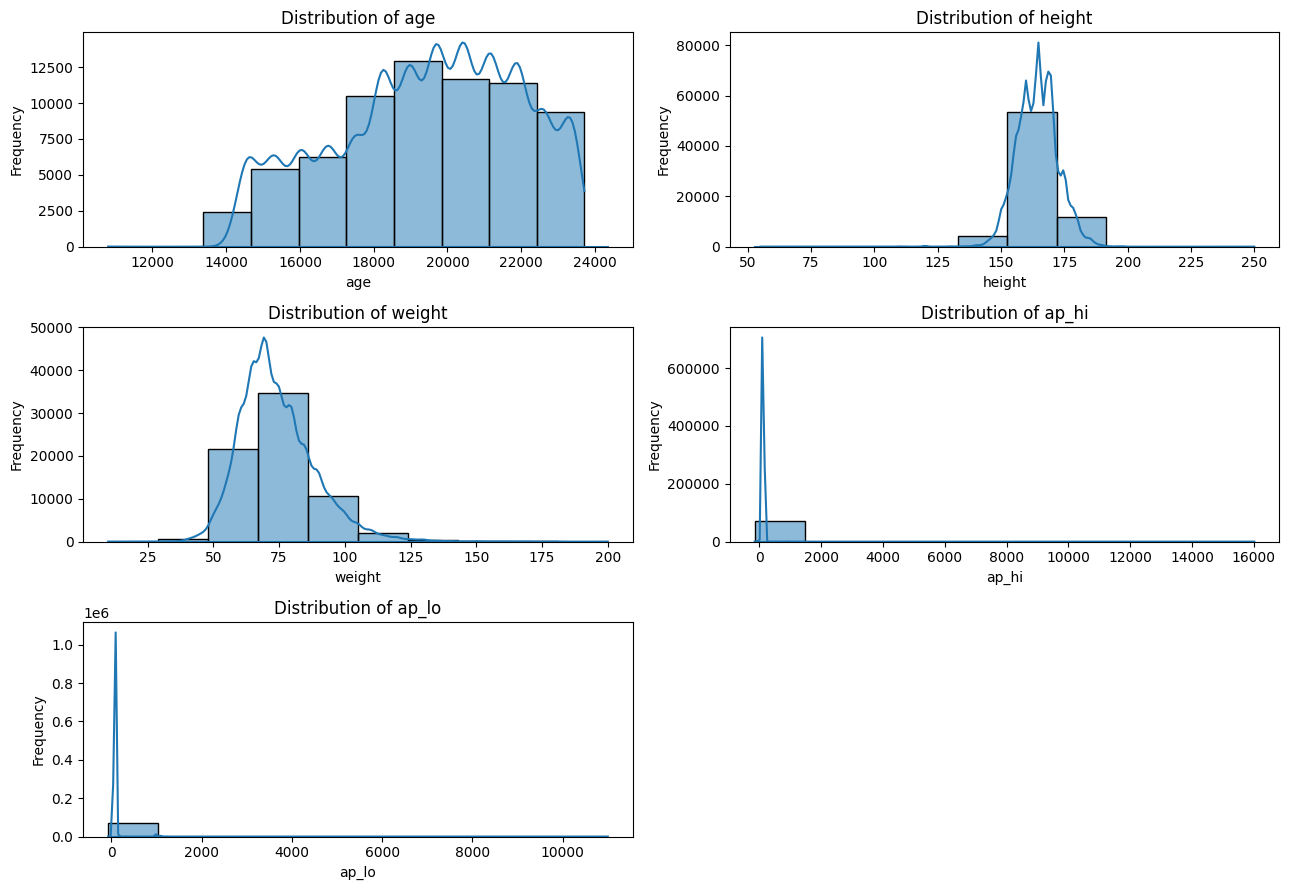

In [ ]:
features =  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

num_features = len(features)
num_rows = (num_features + 1) // 2

plt.figure(figsize=(13, num_rows * 3))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df[feature], bins=10, kde=True, edgecolor='k')
    sample = df[feature].sample(5000, random_state=0)
    sns.kdeplot(sample, bw_adjust=0.5)  
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **Check Outlier Numerical Feature**

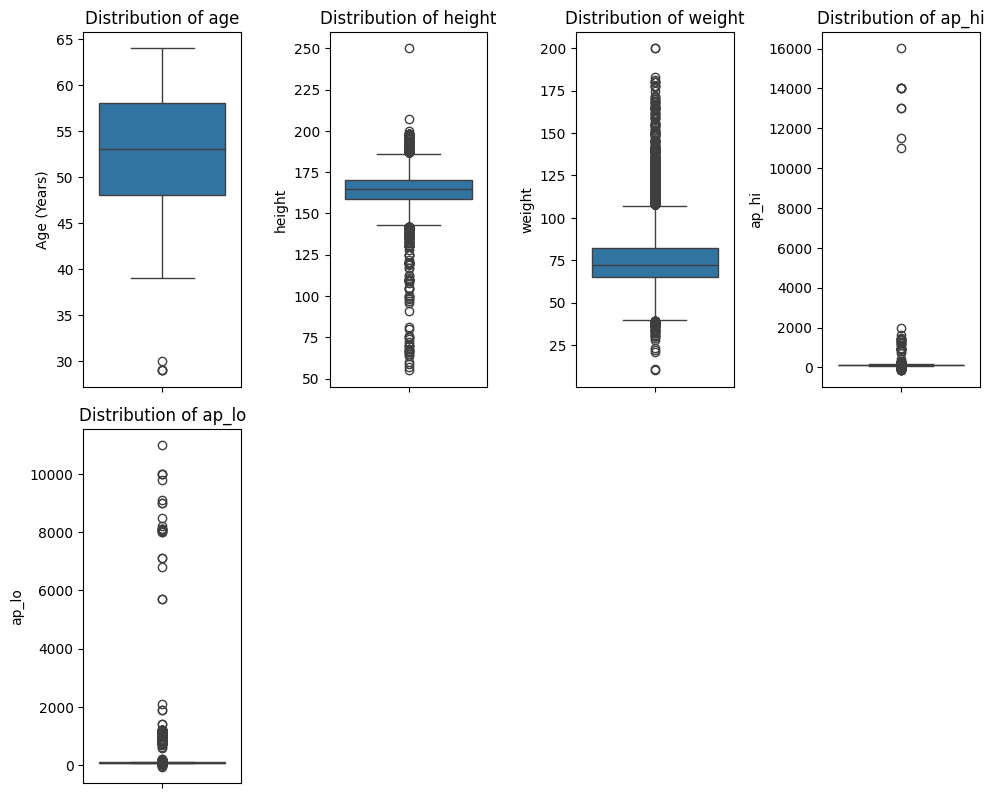

In [184]:
features =  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


num_features = len(features)
num_rows = (num_features + 1) // 2 

plt.figure(figsize=(10, num_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 4, i + 1)
    
    if feature == 'age':
        data = (df[feature] / 365).astype(int)  
        ylabel = 'Age (Years)'
    else:
        data = df[feature]
        ylabel = feature

    sns.boxplot(y=data)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')  
    plt.ylabel(ylabel)

plt.tight_layout()
plt.show()

#### **DDistribution of Categorical Variable**

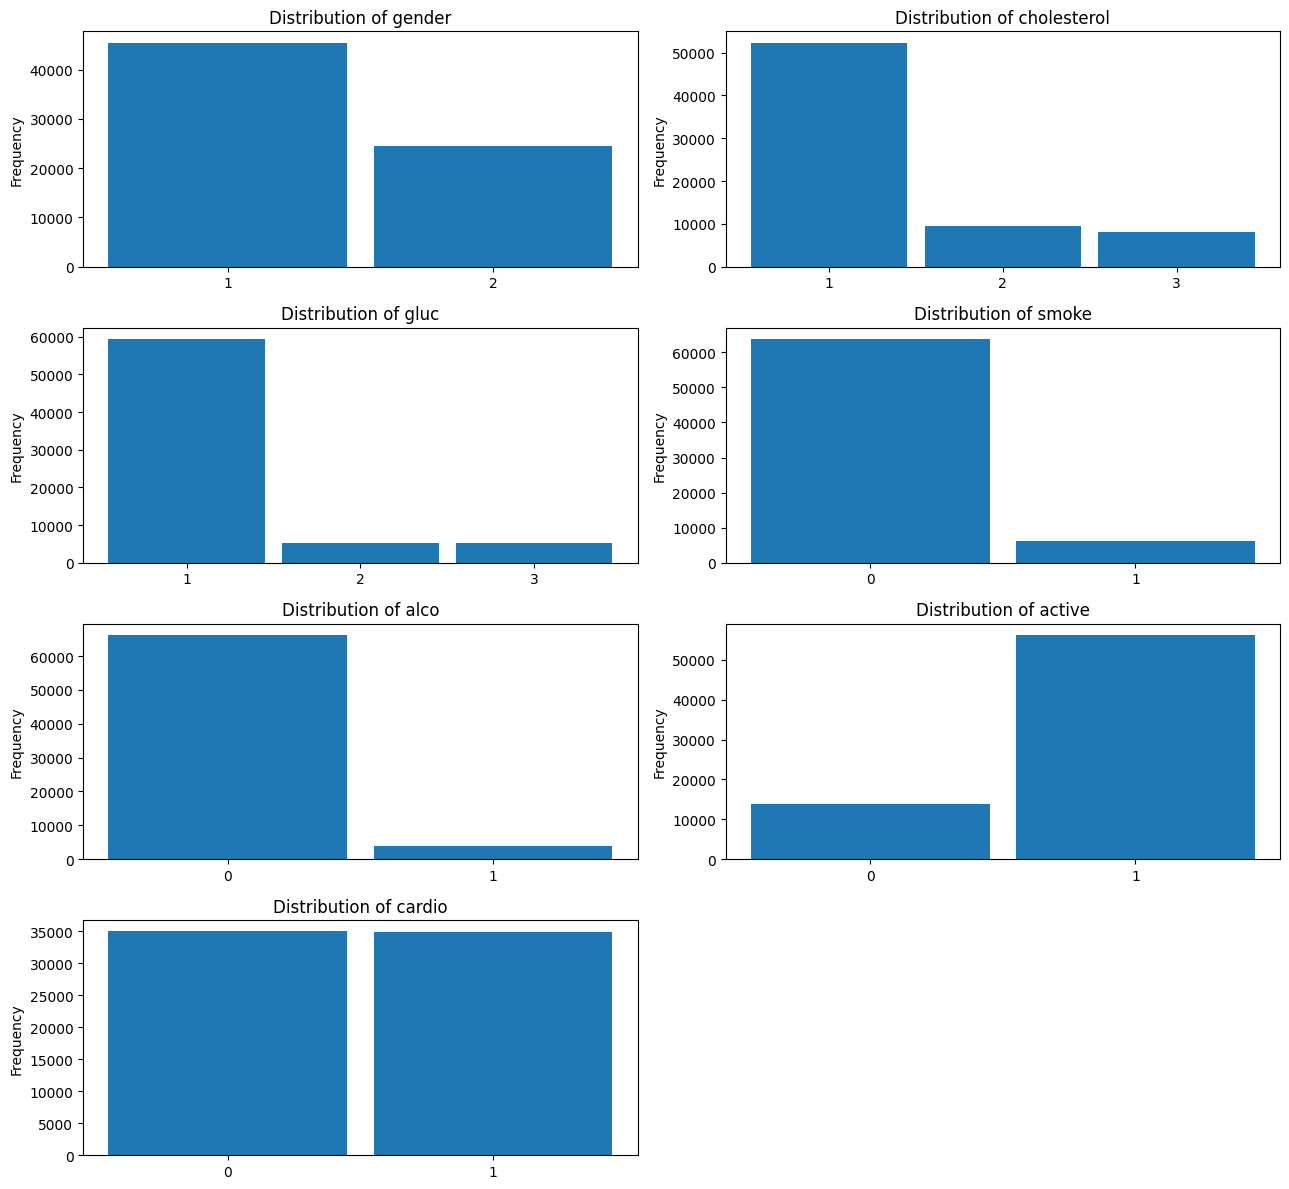

In [ ]:
features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cat_features = len(features)
cat_rows = (cat_features + 1) // 2

plt.figure(figsize=(13, cat_rows * 3))

for i, feature in enumerate(features):
    plt.subplot(cat_rows, 2, i + 1)
    data = df[feature]
    counts = data.value_counts().sort_index()
    unique_vals = sorted(data.unique())

    bar_width = 0.9
    plt.bar(counts.index, counts.values, width=bar_width)
    
    plt.xticks(unique_vals)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **Corr Matrix**

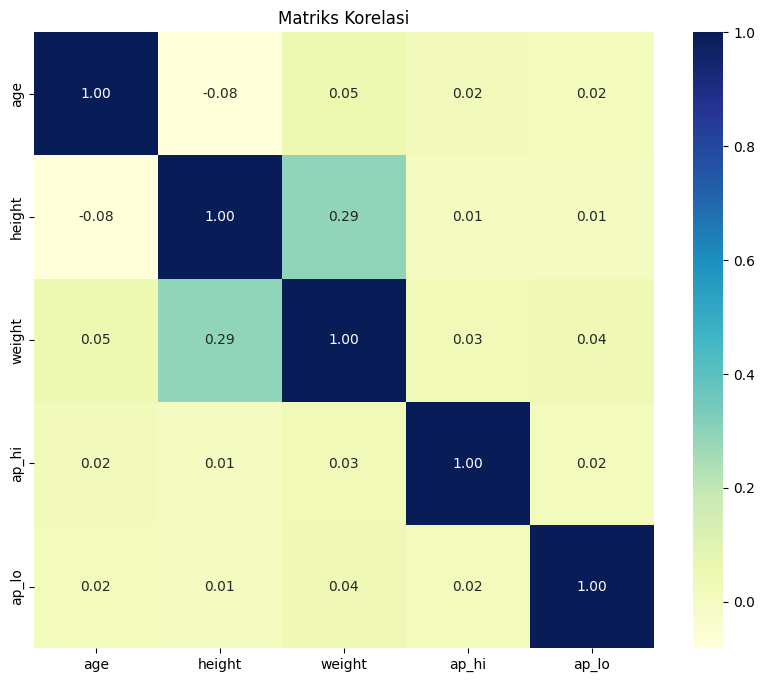

In [186]:
features =  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
corr = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

### **Data Preprocessing**

In [187]:
df = pd.read_csv('data/cardio.csv', sep=';')
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic'}, inplace=True)
print('Sample Data')
display(df.head())

display(df.describe())

Sample Data


,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# # Remove outliers for blood pressure using the IQR method.
# def remove_outliers_iqr(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df

# df = remove_outliers_iqr(df, ['systolic', 'diastolic', 'weight', 'height'])

# # Drop non-predictive columns, such as 'id', if it exists.
# if 'id' in df.columns:
#     df.drop(columns=['id'], inplace=True)

# # Define the categorical and target columns
# cat_cols = ['cholesterol', 'gluc','gender', 'smoke', 'alco', 'active']
# target_col = ['cardio']

# # Create a new order by taking all non-categorical, non-target columns first
# # then the categorical columns, and finally the target column
# new_order = [col for col in df.columns if col not in cat_cols + target_col] + cat_cols + target_col

# # Reorder the DataFrame
# df = df[new_order]

# display(df.describe())

In [ ]:
# Rename column ap_hi --> systolic, ap_lo --> diastolic
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic'}, inplace=True)

# Drop non-predictive columns, such as 'id', if it exists.
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
    
# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

# Validate blood pressure values:
# Ensure both systolic and diastolic are positive and systolic is greater than diastolic.
df = df[(df['systolic'] > 0) & (df['diastolic'] > 0)]
df = df[df['systolic'] > df['diastolic']]

# Remove outliers using the IQR method.
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df, ['systolic', 'diastolic', 'weight', 'height'])

# Keep only valid categorical values
df = df[df['gender'].isin([1, 2])]
df = df[df['cholesterol'].isin([1, 2, 3])]
df = df[df['gluc'].isin([1, 2, 3])]
df = df[df['smoke'].isin([0, 1])]
df = df[df['alco'].isin([0, 1])]
df = df[df['active'].isin([0, 1])]

# 1. Binary encoding for gender (female=0, male=1)
#    Original values: 1 = female, 2 = male
df['gender'] = df['gender'].map({
    1: 0,  # map female (1) → 0
    2: 1   # map male   (2) → 1
})

# 2. Ordinal encoding for cholesterol (levels 1–3) # e.g. {1: 0, 2: 1, 3: 2}
le_chol = LabelEncoder()
df['cholesterol'] = le_chol.fit_transform(df['cholesterol'])

# 3. Ordinal encoding for glucose (levels 1–3) # e.g. {1: 0, 2: 1, 3: 2}
le_gluc = LabelEncoder()
df['gluc'] = le_gluc.fit_transform(df['gluc'])

# Define the categorical and target columns
cat_cols = ['cholesterol', 'gluc','gender', 'smoke', 'alco', 'active']
target_col = ['cardio']

# Create a new order by taking all non-categorical, non-target columns first
# then the categorical columns, and finally the target column
new_order = [col for col in df.columns if col not in cat_cols + target_col] + cat_cols + target_col

# Reorder the DataFrame
df = df[new_order]

print('\nStatistika Deskriptif Setelah Preprocessing')
display(df.describe())

Mapping for gender: {1 → 0 (female), 2 → 1 (male)}
Mapping for cholesterol: {1: 0, 2: 1, 3: 2}
Mapping for glucose: {1: 0, 2: 1, 3: 2}

Statistika Deskriptif Setelah Preprocessing


,age,height,weight,systolic,diastolic,cholesterol,gluc,gender,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,52.908035,164.405491,73.179792,126.421379,81.698026,0.357717,0.220649,0.348533,0.086333,0.052158,0.804342,0.493872
std,6.743158,7.530956,12.271424,14.288491,7.672500,0.675203,0.567601,0.476510,0.280858,0.222348,0.396709,0.499966
min,29.000000,143.000000,40.000000,90.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,81.000000,140.000000,90.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,186.000000,107.000000,170.000000,105.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`Multivariate`

In [ ]:
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor

# # 1. Select numeric features for multivariate anomaly detection
# features = ["age", "height", "weight", "systolic", "diastolic"]
# X = df[features]

# # ——————————————————————————————————————————————
# # A. Isolation Forest (non-parametric method)
# iso = IsolationForest(
#     n_estimators=100,      # number of trees
#     contamination=0.01,    # assume ~1% of the data are outliers
#     random_state=42
# )
# df["iso_label"]  = iso.fit_predict(X)       # +1 = inlier, -1 = outlier
# df["iso_score"]  = iso.decision_function(X) # lower score → more anomalous

# # B. Local Outlier Factor (density-based method)
# lof = LocalOutlierFactor(
#     n_neighbors=20,
#     contamination="auto"   # let LOF estimate the proportion of anomalies
# )
# df["lof_label"] = lof.fit_predict(X)         # +1 = inlier, -1 = outlier
# df["lof_score"] = -lof.negative_outlier_factor_  # higher score → more anomalous

# # ——————————————————————————————————————————————
# # 2. Inspect results
# # Combine condition: if either Isolation Forest or LOF labels as -1 → mark as anomaly
# df["multi_anomaly"] = ((df["iso_label"] == -1) | (df["lof_label"] == -1))

# print(f"Total records: {len(df):,}")
# print(f"Total multivariate anomalies: {df['multi_anomaly'].sum():,}\n")

# # 3. Show top 10 most severe anomalies based on combined scores
# anoms = df[df["multi_anomaly"]].copy()
# anoms["combined_score"] = (
#     (-df["iso_score"]) +   # Isolation Forest: lower score = more anomalous
#     df["lof_score"]        # LOF: higher score = more anomalous
# )
# anoms = anoms.sort_values("combined_score", ascending=False)

# display(
#     anoms[ features + ["iso_score", "lof_score", "combined_score"] ].head(10)
# )


In [191]:
display(df.head())

,age,height,weight,systolic,diastolic,cholesterol,gluc,gender,smoke,alco,active,cardio
0,50,168,62.0,110,80,0,0,1,0,0,1,0
1,55,156,85.0,140,90,2,0,0,0,0,1,1
2,51,165,64.0,130,70,2,0,0,0,0,0,1
3,48,169,82.0,150,100,0,0,1,0,0,1,1
5,60,151,67.0,120,80,1,1,0,0,0,0,0


### **Exploratory Data Analysis (EDA) Tahap 2**

#### **Corr**

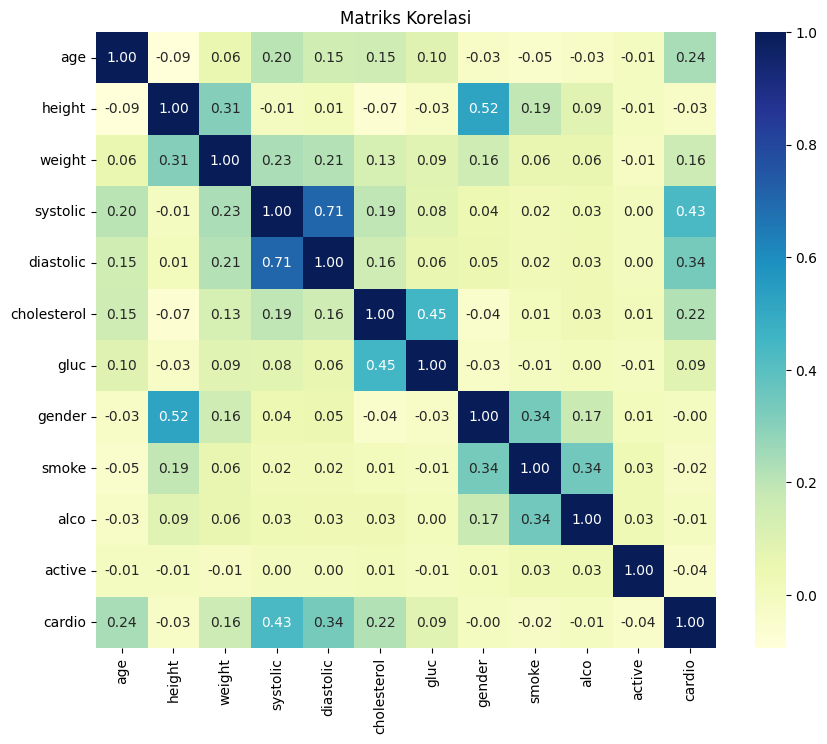

In [192]:
correlations = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

#### **Check Imbalance**

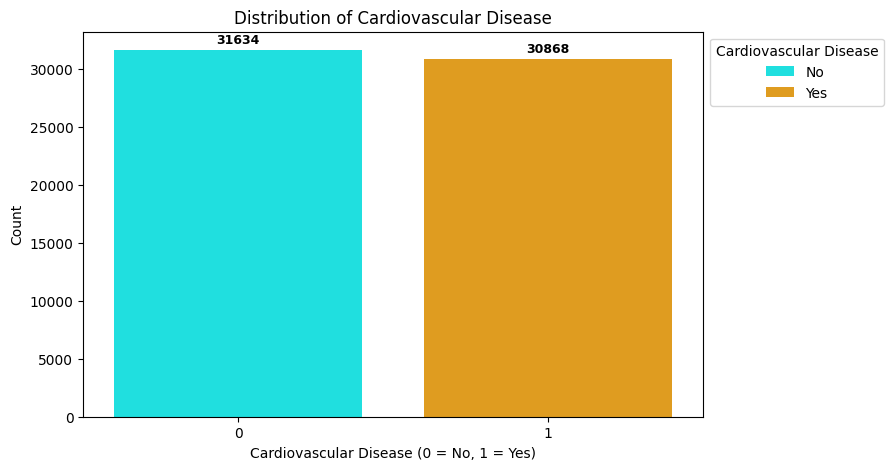

In [193]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='cardio', data=df, hue='cardio', palette={0: 'aqua', 1: 'orange'})

plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=9, color='black', fontweight='bold', 
                    xytext=(0, 5), textcoords='offset points')

plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

- Terdapat 32,337 pasien yang tidak memiliki penyakit kardiovaskular (nilai 0) dan 32,132 pasien yang memiliki penyakit kardiovaskular (nilai 1).
- Dataset ini cukup seimbang dengan hanya selisih 205 data antara pasien dengan dan tanpa penyakit kardiovaskular, sehingga model machine learning tidak rentan terhadap masalah ketidakseimbangan kelas.

#### **Distribution Based on CVD Status**

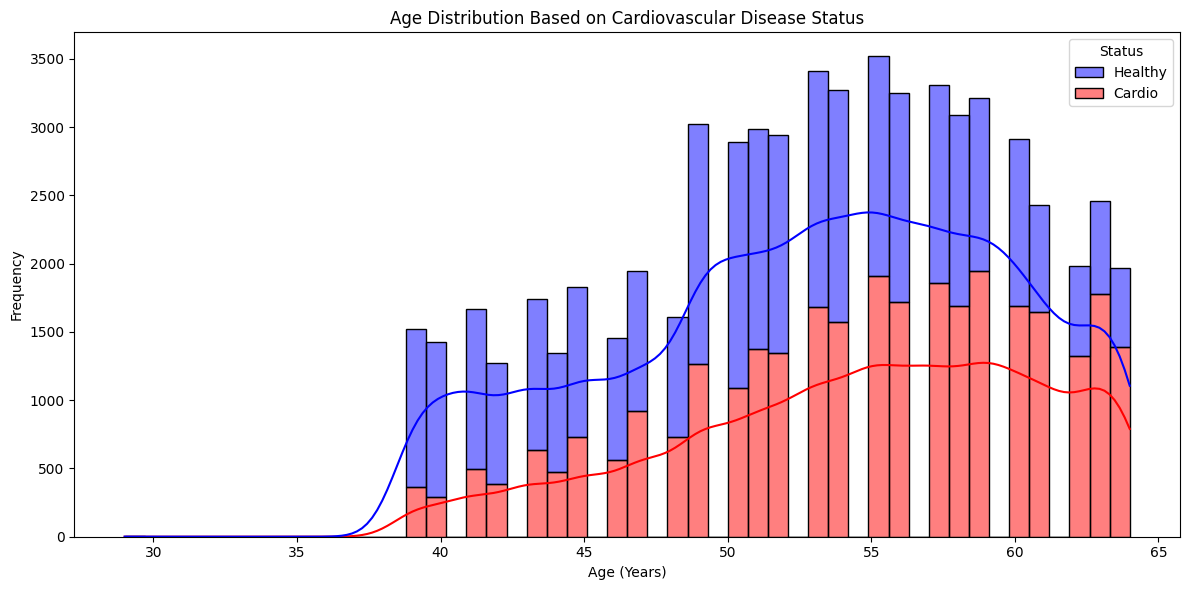

In [194]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='age', hue='cardio', multiple='stack', bins=50, kde=True, palette={0: 'blue', 1: 'red'})
plt.title('Age Distribution Based on Cardiovascular Disease Status')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

plt.tight_layout()

legend = ax.get_legend()
legend.set_title("Status")
labels = ['Healthy', 'Cardio']
for i, text in enumerate(legend.texts):
    text.set_text(labels[i])
    
plt.show()



- Penyakit kardiovaskular lebih umum terjadi pada usia di atas 45 tahun, dengan puncak kasus pada rentang usia 50-60 tahun.
- Risiko penyakit kardiovaskular meningkat seiring bertambahnya usia, terutama setelah usia 45 tahun.

#### **Gender Distribution by CVD Category**

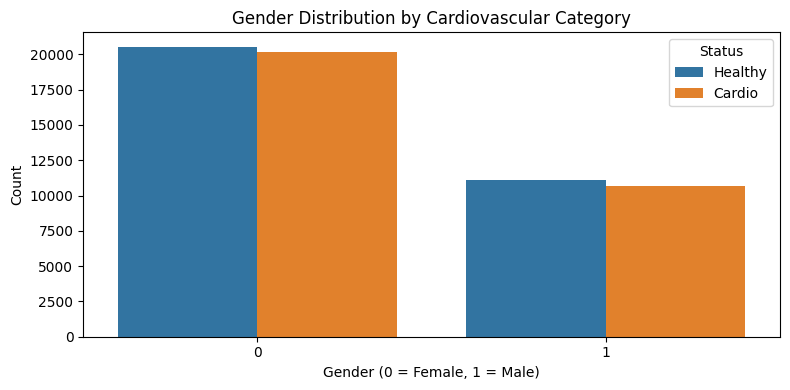

In [195]:
fig, ax = plt.subplots(figsize=(8, 4))  # only one subplot, so 'ax' is not an array

sns.countplot(x='gender', hue='cardio', data=df, ax=ax)
ax.set_title('Gender Distribution by Cardiovascular Category')
ax.set_xlabel('Gender (0 = Female, 1 = Male)')
ax.set_ylabel('Count')
ax.legend(title='Status', labels=['Healthy', 'Cardio'])

plt.tight_layout()
plt.show()


#### **Cholesterol and Glucose Distribution by CVD Category**

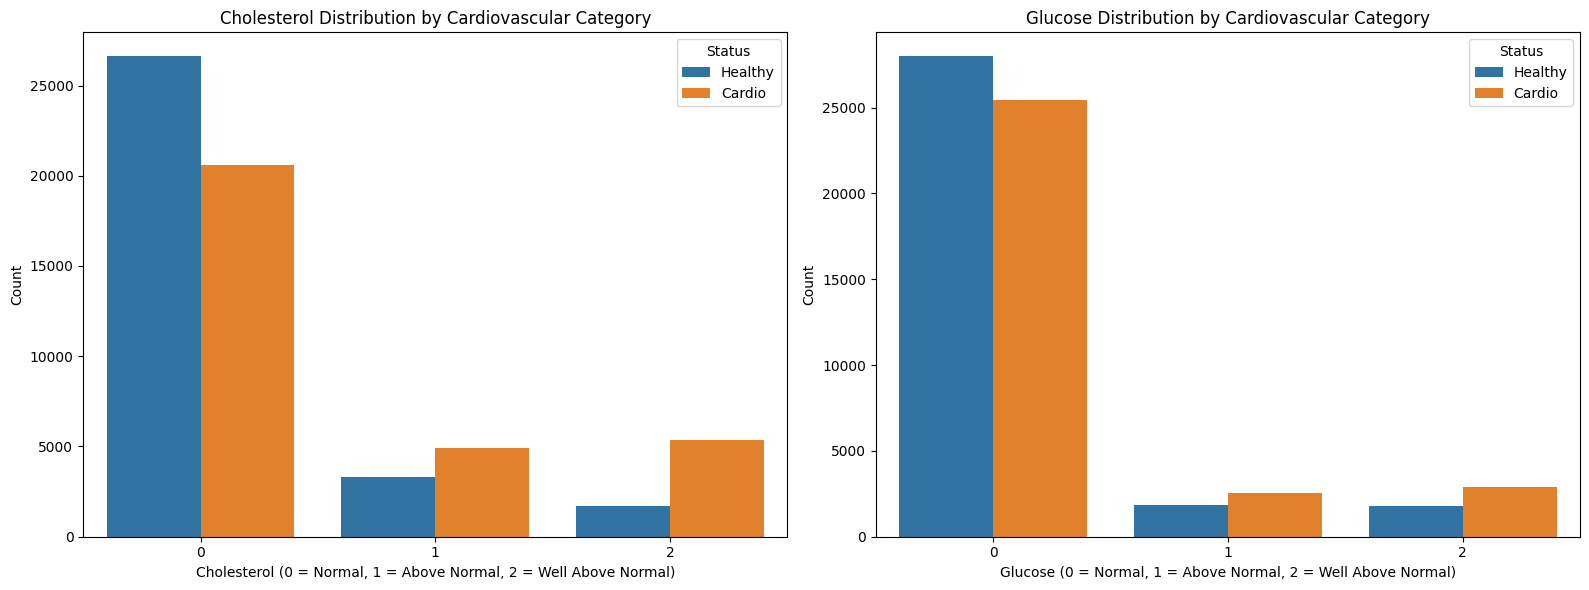

In [196]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='cholesterol', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Cholesterol Distribution by Cardiovascular Category')
axs[0].set_xlabel('Cholesterol (0 = Normal, 1 = Above Normal, 2 = Well Above Normal)')
axs[0].set_ylabel('Count')
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'])

sns.countplot(x='gluc', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Glucose Distribution by Cardiovascular Category')
axs[1].set_xlabel('Glucose (0 = Normal, 1 = Above Normal, 2 = Well Above Normal)')
axs[1].set_ylabel('Count')
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'])

plt.tight_layout()
plt.show()


#### **Lifestyle Habit Distribution by CVD Category**

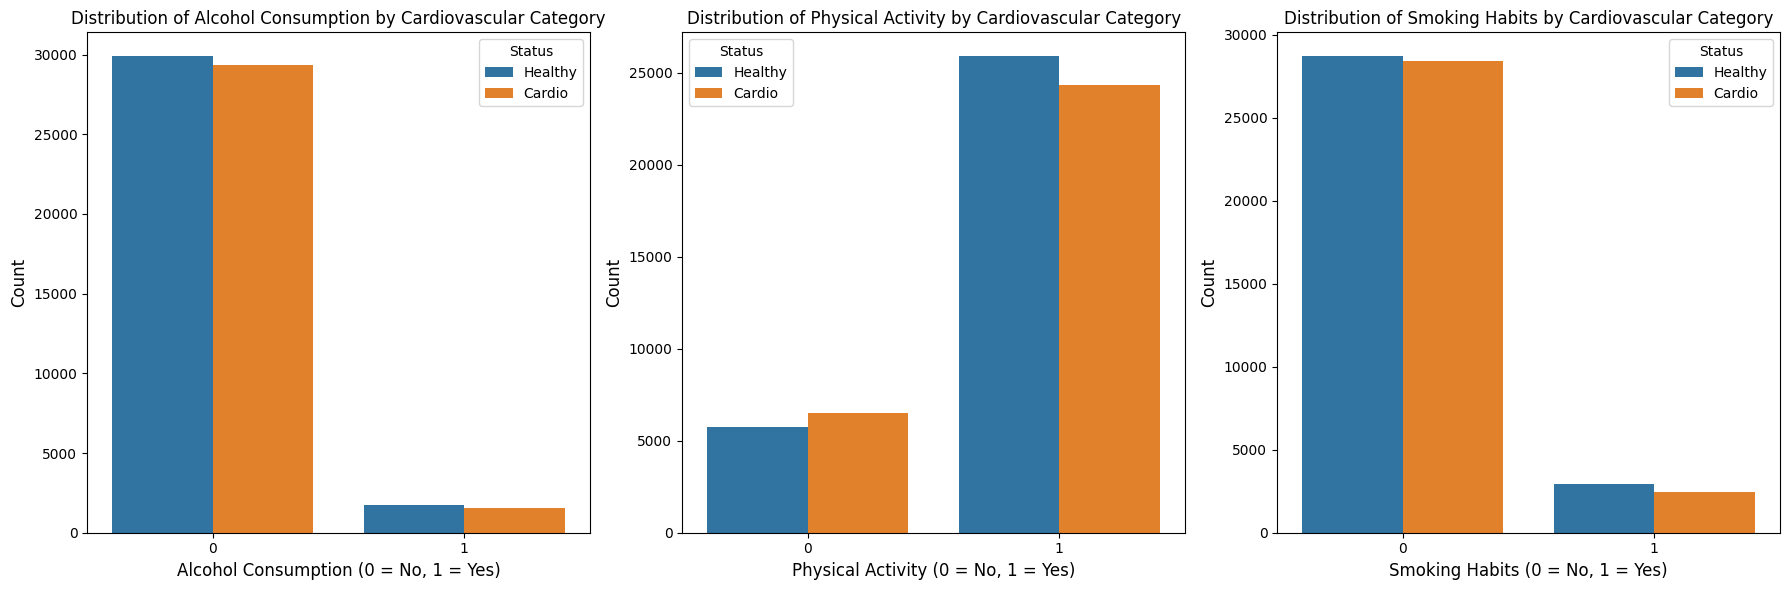

In [197]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='alco', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Distribution of Alcohol Consumption by Cardiovascular Category', fontsize=12)
axs[0].set_xlabel('Alcohol Consumption (0 = No, 1 = Yes)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

sns.countplot(x='active', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Distribution of Physical Activity by Cardiovascular Category', fontsize=12)
axs[1].set_xlabel('Physical Activity (0 = No, 1 = Yes)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

sns.countplot(x='smoke', hue='cardio', data=df, ax=axs[2])
axs[2].set_title('Distribution of Smoking Habits by Cardiovascular Category', fontsize=12)
axs[2].set_xlabel('Smoking Habits (0 = No, 1 = Yes)', fontsize=12)
axs[2].set_ylabel('Count', fontsize=12)
axs[2].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

plt.tight_layout()
plt.show()


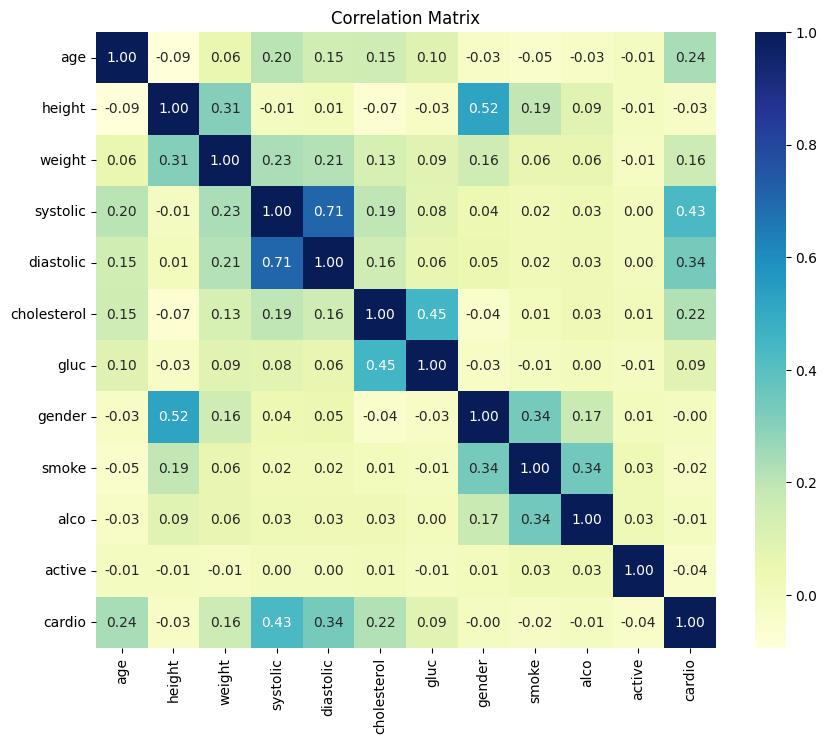

In [198]:
correlations = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### **Feature Engineering**

In [199]:
df['bmi'] = round(df['weight'] / (df['height'] / 100) ** 2,2)

df['map'] = round((df['systolic'] + 2 * df['diastolic']) / 3,2)

df["pulse_pressure"] = df["systolic"] - df["diastolic"]

In [200]:
display(df.head())
display(df.info())

,age,height,weight,systolic,diastolic,cholesterol,gluc,gender,smoke,alco,active,cardio,bmi,map,pulse_pressure
0,50,168,62.0,110,80,0,0,1,0,0,1,0,21.97,90.00,30
1,55,156,85.0,140,90,2,0,0,0,0,1,1,34.93,106.67,50
2,51,165,64.0,130,70,2,0,0,0,0,0,1,23.51,90.00,60
3,48,169,82.0,150,100,0,0,1,0,0,1,1,28.71,116.67,50
5,60,151,67.0,120,80,1,1,0,0,0,0,0,29.38,93.33,40


<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             62502 non-null  int64  
 1   height          62502 non-null  int64  
 2   weight          62502 non-null  float64
 3   systolic        62502 non-null  int64  
 4   diastolic       62502 non-null  int64  
 5   cholesterol     62502 non-null  int64  
 6   gluc            62502 non-null  int64  
 7   gender          62502 non-null  int64  
 8   smoke           62502 non-null  int64  
 9   alco            62502 non-null  int64  
 10  active          62502 non-null  int64  
 11  cardio          62502 non-null  int64  
 12  bmi             62502 non-null  float64
 13  map             62502 non-null  float64
 14  pulse_pressure  62502 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 7.6 MB


None

<!-- ## Fitur Input dan Tipe

Dataset terdiri dari 70,000 data pasien dengan 19 fitur berikut:

| Nama Fitur                     | Tipe Fitur           | Nama Kolom dalam Data       | Tipe Data                                  |
|--------------------------------|----------------------|-----------------------------|--------------------------------------------|
| **Age**                        | Objective Feature    | age                         | int (years)                                |
| **Gender**                     | Objective Feature    | gender                      | binary; 0: female, 1: male                |
| **Height**                     | Objective Feature    | height                      | int (cm)                                   |
| **Weight**                     | Objective Feature    | weight                      | float (kg)                                 |
| **Systolic blood pressure**    | Examination Feature  | ap_hi                       | int (mm/Hg)                                |
| **Diastolic blood pressure**   | Examination Feature  | ap_lo                       | int (mm/Hg)                                |
| **Cholesterol**                | Examination Feature  | cholesterol                 | ordinal; 1: normal, 2: above normal, 3: well above normal |
| **Glucose**                    | Examination Feature  | gluc                        | ordinal; 1: normal, 2: above normal, 3: well above normal |
| **Smoking**                    | Subjective Feature   | smoke                       | binary; 0: no, 1: yes                      |
| **Alcohol intake**             | Subjective Feature   | alco                        | binary; 0: no, 1: yes                      |
| **Physical activity**          | Subjective Feature   | active                      | binary; 0: no, 1: yes                      |
| **Body Mass Index (BMI)**      | Derived Feature      | bmi                         | float                                      |
| **Age Group**                  | Derived Feature      | age_group                   | ordinal; 0: Young, 1: Middle-aged, 2: Senior |
| **Blood Pressure Category**    | Derived Feature      | blood_pressure_category     | ordinal; 0: Normal, 1: Elevated, 2: Hypertension Stage 1, 3: Hypertension Stage 2 |
| **Pulse Pressure**             | Derived Feature      | pulse_pressure              | int (mm/Hg)                                |
| **Mean Arterial Pressure** | Derived Feature     | map                         | float                                      |
| **Obesity Level**              | Derived Feature      | obesity_level               | ordinal; 0: Underweight, 1: Normal weight, 2: Overweight, 3: Obesity |
| **Systolic to Diastolic Ratio** | Derived Feature     | systolic_to_diastolic_ratio | float                                      |
| **Presence or Absence of Cardiovascular Disease** | Target Variable | cardio                   | binary; 0: healthy, 1: cardio              |

### Penjelasan Fitur Tambahan
- **BMI**: Indeks massa tubuh, dihitung berdasarkan berat dan tinggi badan.
- **Age Group**: Kelompok usia yang dibagi menjadi Young, Middle-aged, dan Senior.
- **Blood Pressure Category**: Kategori tekanan darah berdasarkan nilai systolic dan diastolic.
- **Pulse Pressure**: Selisih antara tekanan darah sistolik dan diastolik.
- **MAP**: Mean Arterial Pressure, rata-rata tekanan arteri selama satu siklus jantung.
- **Obesity Level**: Tingkat obesitas berdasarkan BMI.
- **Systolic to Diastolic Ratio**: Rasio antara tekanan darah sistolik dan diastolik.
 -->


In [201]:
cat_cols = ['cholesterol', 'gluc', 'gender', 'smoke', 'alco', 'active']
target_col = ['cardio']

new_order = [col for col in df.columns if col not in cat_cols + target_col] + cat_cols + target_col

df = df[new_order]

In [202]:
df.head(5)

,age,height,weight,systolic,diastolic,bmi,map,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
0,50,168,62.0,110,80,21.97,90.00,30,0,0,1,0,0,1,0
1,55,156,85.0,140,90,34.93,106.67,50,2,0,0,0,0,1,1
2,51,165,64.0,130,70,23.51,90.00,60,2,0,0,0,0,0,1
3,48,169,82.0,150,100,28.71,116.67,50,0,0,1,0,0,1,1
5,60,151,67.0,120,80,29.38,93.33,40,1,1,0,0,0,0,0


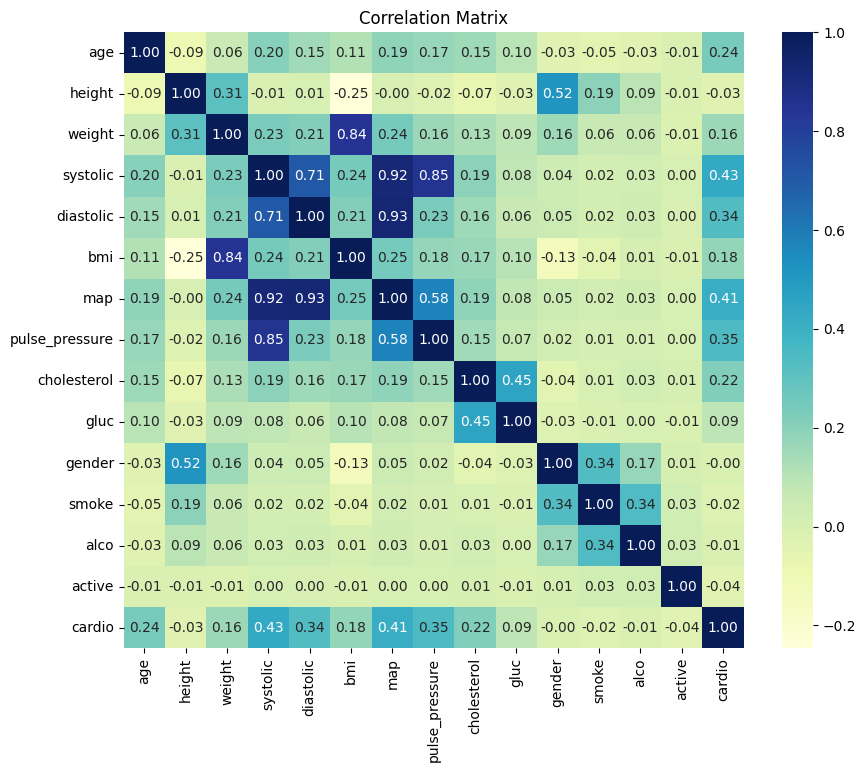

In [203]:
correlations = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
display(df.describe())

,age,height,weight,systolic,diastolic,bmi,map,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,52.908035,164.405491,73.179792,126.421379,81.698026,27.119910,96.604739,44.723353,0.357717,0.220649,0.348533,0.086333,0.052158,0.804342,0.493872
std,6.743158,7.530956,12.271424,14.288491,7.672500,4.567569,9.124959,10.402784,0.675203,0.567601,0.476510,0.280858,0.222348,0.396709,0.499966
min,29.000000,143.000000,40.000000,90.000000,65.000000,13.520000,73.330000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.880000,93.330000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.230000,93.330000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,81.000000,140.000000,90.000000,29.760000,103.330000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,186.000000,107.000000,170.000000,105.000000,50.890000,126.000000,103.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
#df.to_csv('data/cleaned_data.csv', index=False)

In [ ]:
# Compute the absolute correlation matrix
corr_matrix = df.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation higher than the threshold
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the selected features
df_reduced = df.drop(columns=to_drop)

print(f"Features dropped: {to_drop}")

Fitur yang dihapus: ['map']


#### **2nd Data Preprocessing**

In [ ]:
# # Define high blood pressure condition
# high_bp = (df['systolic'] > 140) | (df['diastolic'] > 90)

# # Define abnormal cholesterol and glucose levels
# abnormal_cholesterol = (df['cholesterol'] != 0)
# abnormal_glucose = (df['gluc'] != 0)

# # Define unhealthy lifestyle habits
# smoking = (df['smoke'] == 1)
# alcohol = (df['alco'] == 1)
# inactive = (df['active'] == 0)

# # Combine all risk factors
# risk_condition = (
#     high_bp & 
#     abnormal_cholesterol & 
#     abnormal_glucose & 
#     smoking & 
#     alcohol & 
#     inactive 
# )

# # Identify individuals with multiple risk factors but no cardiovascular disease
# risk_but_no_cardio = df[risk_condition & (df['cardio'] == 0)]
# print("Number of records in risk_but_no_cardio:", len(risk_but_no_cardio))

# # Define normal health indicators
# normal_bp = (df['systolic'] <= 140) & (df['diastolic'] <= 90)
# normal_cholesterol = (df['cholesterol'] == 0)
# normal_glucose = (df['gluc'] == 0)
# physically_active = (df['active'] == 1)
# cardio_positive = (df['cardio'] == 1)

# # Identify individuals with normal indicators but diagnosed with cardiovascular disease
# normal_condition = (
#     normal_bp & 
#     normal_cholesterol & 
#     normal_glucose & 
#     physically_active & 
#     cardio_positive
# )

# normal_and_cardio = df[normal_condition]
# print("Number of records in normal_and_cardio:", len(normal_and_cardio))

# # Display the first few rows of individuals with multiple risk factors but no cardiovascular disease
# display(risk_but_no_cardio)

In [ ]:
# # Combine the indices of both risk_but_no_cardio and normal_and_cardio for removal
# index_to_remove = risk_but_no_cardio.index.union(normal_and_cardio.index)

# # Remove the selected records from the dataset
# df.drop(index=index_to_remove, inplace=True)
# print("Number of records after removal:", len(df))

# # Drop unnecessary columns
# df.drop(columns=['age', 'height', 'weight', 'systolic', 'diastolic', 'bmi', 'map'], inplace=True)

# # Encode the 'bmi_category' column
# desired_order_bmi = ['Underweight', 'Normal', 'Overweight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III']
# df['bmi_category'] = pd.Categorical(df['bmi_category'], categories=desired_order_bmi, ordered=True)
# df['bmi_category'] = df['bmi_category'].cat.codes
# mapping = {category: code for category, code in zip(desired_order_bmi, range(len(desired_order_bmi)))}
# print("Mapping for bmi_category:", mapping)

# # Encode the 'map_category' column using LabelEncoder
# le_map = LabelEncoder()
# df['map_category'] = le_map.fit_transform(df['map_category'])
# print("Mapping for map_category:", {cls: encoded for cls, encoded in zip(le_map.classes_, le_map.transform(le_map.classes_))})

# # Encode the 'age_category' column
# desired_order = ['Young', 'Middle-Aged', 'Older', 'Senior']
# df['age_category'] = pd.Categorical(df['age_category'], categories=desired_order, ordered=True)
# df['age_category'] = df['age_category'].cat.codes
# mapping = {category: code for category, code in zip(desired_order, range(len(desired_order)))}
# print("Mapping for age_category:", mapping)

# df

# 0–20 → 'Young'

# 21–40 → 'Middle-Aged'

# 41–60 → 'Older'

# 61–100 → 'Senior'

In [209]:
# display(df.describe())

In [210]:
# plt.figure(figsize=(8, 5))

# ax = sns.countplot(x='cardio', data=df, hue='cardio', palette={0: 'aqua', 1: 'orange'})

# plt.title('Distribution of Cardiovascular Disease')
# plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
# plt.ylabel('Count')

# for p in ax.patches:
#     if p.get_height() > 0: 
#         ax.annotate(f'{int(p.get_height())}', 
#                     (p.get_x() + p.get_width() / 2., p.get_height()), 
#                     ha='center', va='baseline', 
#                     fontsize=9, color='black', fontweight='bold', 
#                     xytext=(0, 5), textcoords='offset points')

# plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))

# plt.show()

In [211]:
#df.to_csv('data/preprocessed_data_full_encoded_new.csv', index=False)